# Statistics

## Describing a dataset

In [128]:
import random

random.seed(42)
num_friends = [random.randint(1, 100) for _ in range(500)]

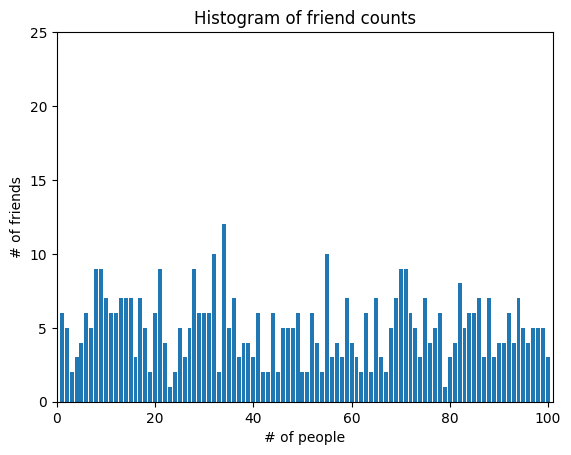

In [129]:
from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0,101,0,25])
plt.title("Histogram of friend counts")
plt.xlabel("# of people")
plt.ylabel("# of friends")
plt.plot()
plt.show()

In [130]:
num_points = len(num_friends)
num_points

500

In [131]:
largest_value = max(num_friends)
lowest_value = min(num_friends)

largest_value, lowest_value

(100, 1)

### Central tendencies

#### Mean / Average

In [132]:
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs)/len(xs)

mean(num_friends)

49.222

#### Median 

 The underscores indicate that these are "private" functions, as they're intended to be called by our median function but not by other people using our statistics library.

In [133]:
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

In [134]:
def _median_even(xs: List[float])-> float:
    """If len(xs) is odd, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2 
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

In [135]:
def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return  _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 6,8]) == 6
assert median([2,4,6,8]) == (4 + 6) / 2

In [136]:
median(num_friends)

48.0

#### Quantile

A generalization of the median is the quantile, which represents the value under
which a certain percentile of the data lies (the median represents the value under
which 50% of the data lies)

In [137]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index  = int(p * len(xs))
    # print(f'index {p_index} is {p * 100} % of {len(xs)}, original list lenght')
    return sorted(xs)[p_index]

quantile(num_friends, 0.5)

48

#### Mode

Most frequent value

In [138]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

mode(num_friends)

[34]

### Dispersion
Dispersion refers to measures of how spread out our data is. Typically they’re statistics
for which values near zero signify not spread out at all and for which large values
(whatever that means) signify very spread out. 

#### Range
For instance, a very simple measure is the range, which is just the difference between the largest and smallest elements:

In [139]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) ==  99

#### Variance

In [140]:
def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

In [141]:
# copy paste from linear algebra nb
def dot(v: List[float], w: List[float]) -> float:
    """ Computes v_1 * w_1 + ... +  v_n * w_n"""
    assert len(v) == len(w), "vectors must be same lenght"
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32 # 1 * 4 + 2 * 5 + 3 * 6

def sum_of_squares(v: List[float]) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [142]:

def variance(xs: List[float]) -> List[float] :
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "Variance requires at least two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n  - 1)

variance(num_friends)

861.7682525050101

#### Standard deviation std



In [143]:
import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

standard_deviation(num_friends)

29.35588957100449

#### Interquartile range IQR

Both the range and the standard deviation have the same outlier problem that we saw
earlier for the mean.

A more robust alternative computes the difference between the 75th percentile value
and the 25th percentile value, which is quite plainly unaffected by a small number of outliers.

In [145]:
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

interquartile_range(num_friends)

52

### 